In [1]:
%matplotlib widget
# Load packages and settings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)
import seaborn as sns


import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)
from matplotlib import cm # Colormaps
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax1.spines['top'].set_visible(False) 

import os
# import csv
import math

from datetime import date

import datetime

saveFigures = True
# saveFigures = False
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

# Define running mean functions
def rnMean(data,meanWidth):
    return np.convolve(data, np.ones(meanWidth)/meanWidth, mode='valid')
def rnTime(t,meanWidth):
    return t[math.floor(meanWidth/2):-math.ceil(meanWidth/2)+1]

saveFigures is set to: True
Done loading packages


In [2]:
# Define paths
rootdir_data = os.getcwd() +"\\..\\DanskeData\\" 

path_data = rootdir_data + "ssi_data\\"
path_dash = rootdir_data + "ssi_dashboard\\"
path_vacc = rootdir_data + "ssi_vacc\\"

path_figs = os.getcwd() +"\\..\\Figures\\" 

In [18]:
# Data is (only) in the file from the most recent tuesday. 
# Should be made smarter, but here hardcoded
# tuePath = 'SSI_data_2022-01-04'
# tuePath = 'SSI_data_2022-01-11'
for k in range(0,7):
    dayToCheck = np.datetime64('today')-np.timedelta64(k,'D')
    thisWeekDay = (dayToCheck).astype(datetime.datetime).isoweekday()    
    if (thisWeekDay == 2):
        tuePath = 'SSI_data_'+str(dayToCheck)
        if (os.path.exists(path_data + tuePath) == False):
            print('No data for most recent tuesday... If after 14:00, download new data')
            tuePath = 'SSI_data_'+str(dayToCheck-np.timedelta64(7,'D')) 

print(f'Path to latest Tuesday was {tuePath}')

dirPath = path_data + tuePath + '\\'

dirPath = path_data + tuePath + '\\'

df = pd.read_csv(dirPath+'plejehjem_ugeoversigt.csv',delimiter=';',dtype=str)

df = df.iloc[:-1]

Path to latest Tuesday was SSI_data_2022-03-15


In [19]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col].str.replace('.',''))
# df

C:\Users\rakrpe\AppData\Local\Temp\ipykernel_90448\3058015615.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = pd.to_numeric(df[col].str.replace('.',''))


In [20]:
# weekNames[40:]
# [x[2:] for df.Uge
# df.Uge[30:]
# weekNums = [f"{int(x):02d}" for x in df.Uge]
weekNums = df.Uge.apply(lambda x: f"{int(x):02d}")

In [21]:
df

# [str(x.År)+str(x.Uge) for x in df]
# weekNums = df.Uge.apply(lambda x: f"{int(x):02d}")

weekNames = df.År.astype(str)+'-W'+df.Uge.apply(lambda x: f"{int(x):02d}")
# weekNames = df.År.astype(str)+'-'+df.Uge.astype(int).astype(str)
# weekNames = 'Uge '+df.Uge.astype(int).astype(str)

# weekNames[40:]
import datetime
# weekDTs = [np.datetime64(datetime.datetime.strptime(d + '-1', "%Y-W%W-%w")) for d in weekNames]
weekDTs = [np.datetime64(datetime.datetime.strptime(d + '-1', "%Y-W%W-%w")) for d in weekNames]
df.tail()

,År,Uge,Bekæftede tilfælde beboere,Dødsfald blandt bekæftede beboere,Bekræftede tilfælde blandt beboere med 2. stik,Bekræftede tilfælde blandt beboere med 3. stik,Plejehjem med bekæftede tilfælde,Testede beboere,Plejehjem med testede beboere
100,2022,6,2068,98,100,1903,522,30397,873
101,2022,7,2318,105,92,2152,551,27141,853
102,2022,8,2010,141,74,1881,525,22452,828
103,2022,9,1708,124,51,1608,472,18852,814
104,2022,10,1288,109,39,1213,382,15944,752


In [22]:
# df

(18901.0, 19094.05)

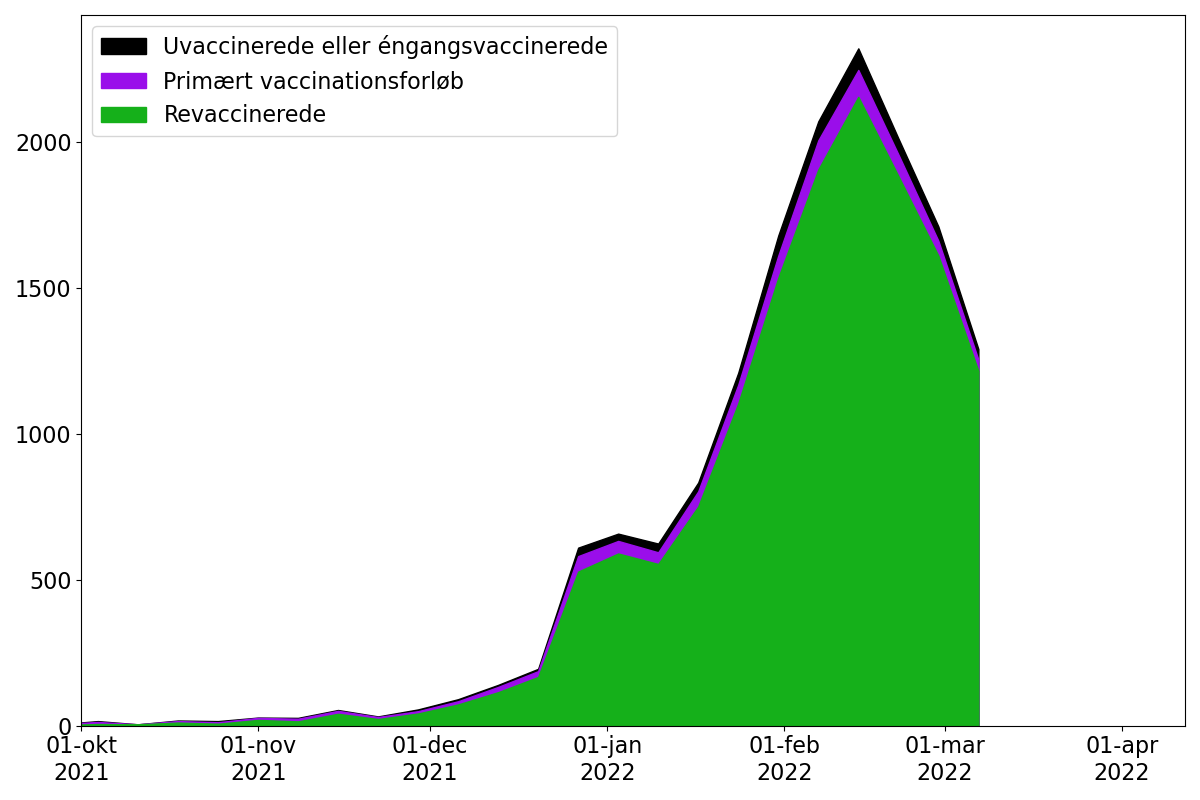

In [23]:
fig,ax1 = plt.subplots(tight_layout=True)

# ax1.plot(weekDTs,df['Dødsfald blandt bekæftede beboere'])
# ax1.plot(weekDTs,df['Bekæftede tilfælde beboere'])
# ax1.plot(weekDTs,df['Bekræftede tilfælde blandt beboere med fuld effekt efter primært vaccinationsforløb'])
# ax1.plot(weekDTs,df['Bekræftede tilfælde blandt beboere med fuld effekt efter revaccination'])

caseTot = df['Bekæftede tilfælde beboere']
# casePrim = df['Bekræftede tilfælde blandt beboere med fuld effekt efter primært vaccinationsforløb']
# caseReva = df['Bekræftede tilfælde blandt beboere med fuld effekt efter revaccination']
casePrim = df['Bekræftede tilfælde blandt beboere med 2. stik']
caseReva = df['Bekræftede tilfælde blandt beboere med 3. stik']
ax1.fill_between(weekDTs,caseTot,color='k',label='Uvaccinerede eller éngangsvaccinerede')
# ax1.plot(weekDTs,casePrim)
ax1.fill_between(weekDTs,caseReva+casePrim,color='xkcd:violet',label='Primært vaccinationsforløb')
ax1.fill_between(weekDTs,caseReva,color='xkcd:green',label='Revaccinerede')

ax1.legend(loc='upper left')


ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b\n%Y'))

ax1.set_ylim(bottom=0)
firstDate = np.datetime64('2021-10-01')
# firstDate = np.datetime64('2021-03-01')
# lastDate = np.datetime64('2022-03-01')
ax1.set_xlim(left=firstDate)

# #Tilts the x labels. 
# for label in ax1.get_xticklabels(which='major'):
#     label.set(rotation=40, horizontalalignment='right')

In [24]:
# import datetime 
weekNames = df.År.astype(str)+'-W'+df.Uge.astype(int).astype(str)
df.tail(10)



,År,Uge,Bekæftede tilfælde beboere,Dødsfald blandt bekæftede beboere,Bekræftede tilfælde blandt beboere med 2. stik,Bekræftede tilfælde blandt beboere med 3. stik,Plejehjem med bekæftede tilfælde,Testede beboere,Plejehjem med testede beboere
95,2022,1,656,39,43,588,211,25065,782
96,2022,2,622,38,40,552,198,23715,785
97,2022,3,831,47,52,749,258,26628,807
98,2022,4,1207,54,64,1102,338,27961,799
99,2022,5,1677,62,76,1532,439,29610,848
100,2022,6,2068,98,100,1903,522,30397,873
101,2022,7,2318,105,92,2152,551,27141,853
102,2022,8,2010,141,74,1881,525,22452,828
103,2022,9,1708,124,51,1608,472,18852,814
104,2022,10,1288,109,39,1213,382,15944,752


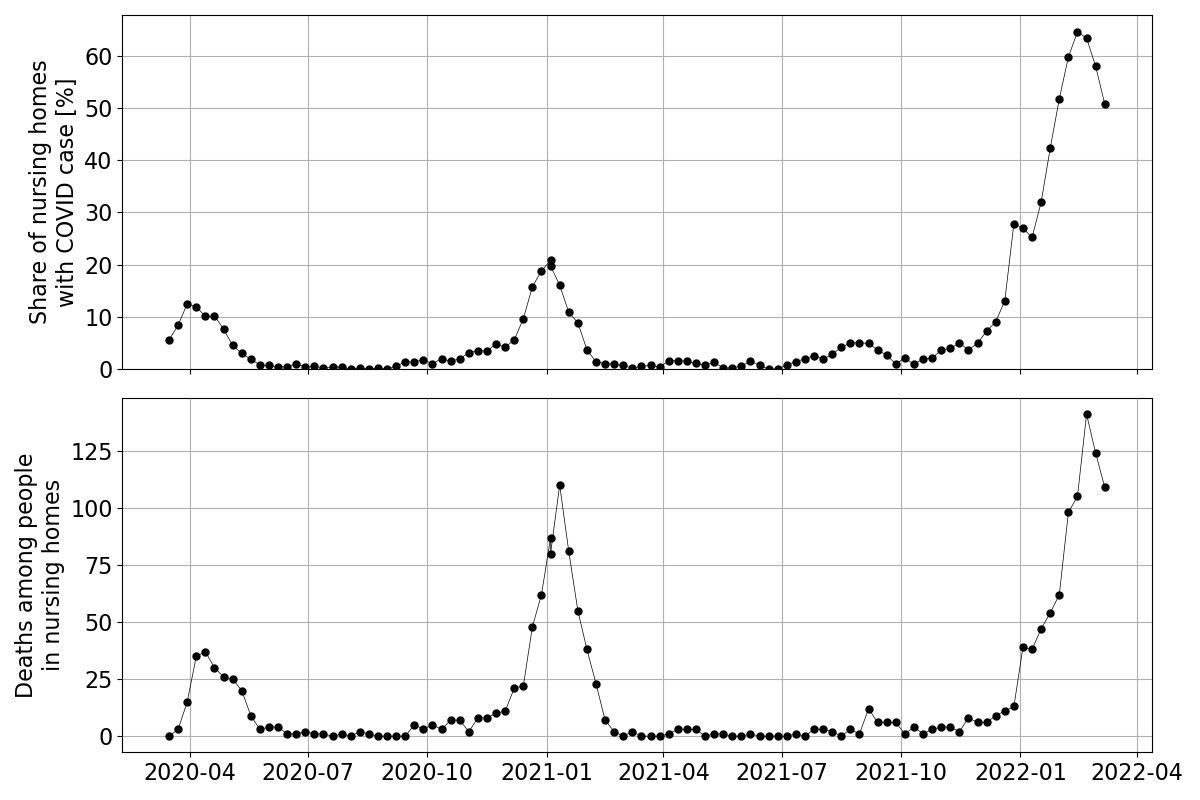

In [25]:
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True) 

ax1.plot(weekDTs,100*df['Plejehjem med bekæftede tilfælde']/df['Plejehjem med testede beboere'],'k.-',linewidth=0.5)
ax2.plot(weekDTs,df['Dødsfald blandt bekæftede beboere'],'k.-',linewidth=0.5)

ax1.set_ylabel('Share of nursing homes\nwith COVID case [%]')
ax2.set_ylabel('Deaths among people\nin nursing homes')
ax1.set_ylim(bottom=0)

ax1.grid()
ax2.grid() 
fig.tight_layout()

if saveFigures:
    fig.savefig(path_figs+'NursingHomes')